

# Project: Investigate a Dataset (MoviesDatabase)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
I used movies database to perform investigate it.

In [50]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [51]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Remove Nulls and duplicates!)

In [52]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Removing nulls and duplicates from data set
#before cleaning
df.info()
df['imdb_id'].fillna('', inplace = True)
df['homepage'].fillna('', inplace = True)
df['cast'].fillna('', inplace = True)
df['tagline'].fillna('', inplace = True)
df['director'].fillna('', inplace = True)
df['keywords'].fillna('', inplace = True)
df['overview'].fillna('', inplace = True)
df['genres'].fillna('', inplace = True)
df['production_companies'].fillna('', inplace = True)
df.drop_duplicates(inplace = True)
#after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which top 3 movies have the high revenues for last 3 years?!)

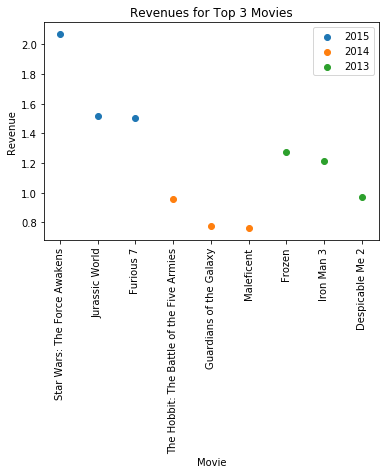

In [53]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#get the last 3 years inseperate variables
year_2013 = df[df['release_year'] == 2013]
year_2014 = df[df['release_year'] == 2014]
year_2015 = df[df['release_year'] == 2015]

#get the 3 highest revenues for each year
highest3_2015 = year_2015.nlargest(3,'revenue')
x_2015 = np.array(highest3_2015['original_title'])
y_2015 = np.array(highest3_2015['revenue']/(10**9))

highest3_2014 = year_2014.nlargest(3,'revenue')
x_2014 = np.array(highest3_2014['original_title'])
y_2014 = np.array(highest3_2014['revenue']/(10**9))

highest3_2013 = year_2013.nlargest(3,'revenue')
x_2013 = np.array(highest3_2013['original_title'])
y_2013 = np.array(highest3_2013['revenue']/(10**9))

#plot the data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l = np.concatenate((x_2015, x_2014, x_2013))

plt.scatter(x[:3], y_2015, label = '2015')
plt.scatter(x[3:6], y_2014, label = '2014')
plt.scatter(x[6:], y_2013, label = '2013')

plt.xticks(x, l, rotation='vertical')

plt.title('Revenues for Top 3 Movies')
plt.xlabel('Movie')
plt.ylabel('Revenue')
plt.legend()

plt.show()


**In the previous chart, it is shown the top 3 movies in term of revenues in (2015, 2014 and 2013) and it is obvious that 2015 has the highest revenue over other years.**

### Research Question 2  (Which genres are most popular for last 3 years?!)

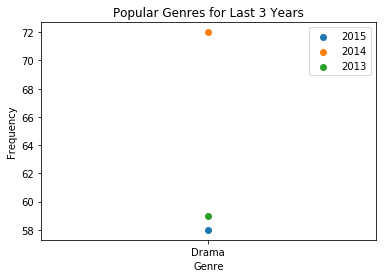

In [54]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#get the maximum genre count for each year
y_2015 = year_2015.groupby('genres').count().max()['id']
x_2015 = year_2015.groupby('genres').count().idxmax()['id']

y_2014 = year_2014.groupby('genres').count().max()['id']
x_2014 = year_2014.groupby('genres').count().idxmax()['id']

y_2013 = year_2013.groupby('genres').count().max()['id']
x_2013 = year_2013.groupby('genres').count().idxmax()['id']

#plot the data
plt.scatter(x_2015, y_2015, label = '2015')
plt.scatter(x_2014, y_2014, label = '2014')
plt.scatter(x_2013, y_2013, label = '2013')

plt.title('Popular Genres for Last 3 Years')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.legend()

plt.show()

**In the previous chart, it is shown the popular genre over the last 3 years (2015, 2014 and 2013). In 2014, most movies have a drama genre.**

### Research Question 3  (what is the highest  3 movies in term of votes?!)


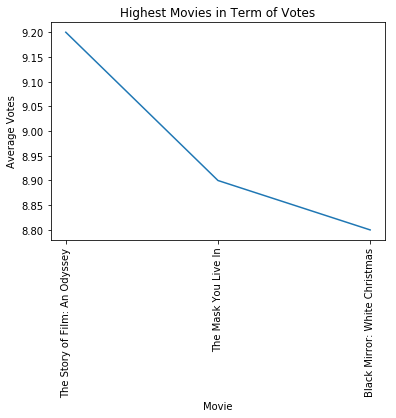

In [55]:
#
highest_votes = df.nlargest(3, 'vote_average')
x = [1, 2, 3]
y = np.array(highest_votes['vote_average'])
l = np.array(highest_votes['original_title'])

plt.plot(x, y)
plt.xlabel('Movie')
plt.ylabel('Average Votes')
plt.title('Highest Movies in Term of Votes')
plt.xticks(x, l, rotation = 'vertical')

plt.show()

**The previous chart represents the highest 3 movies in term of votes, it's obvious that the "The Story of Film: An Odyssey" has the highest votes over all other movies.**

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0